<a href="https://colab.research.google.com/github/AgunsBaba/Assignment/blob/master/ClusteringAlgos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [87]:
#import data
data = pd.read_csv('/content/cust_seg.csv')
data.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [88]:
#feature engineering to add an extra feature called total_debt
data['total_debt'] = data['Card Debt'] + data['Other Debt']

In [89]:
#confirm new feature has been added to dataframe
data.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,total_debt
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3,1.197
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8,12.800
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9,11.913
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3,1.197
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2,18.216


In [90]:
#check general info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
 10  total_debt       850 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 73.2 KB


The 'Deafulted' column has some missing values which has to be handled

In [91]:
#confirm the labels in the 'Defaulted' column
data['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [92]:
#Fill missing values in 'Deaulted' column with the value 1
data['Defaulted'].fillna(value=1, inplace=True)
data.info() #confirm there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        850 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
 10  total_debt       850 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 73.2 KB


In [93]:
#drop columns that have no predictive value
data = data.drop(columns=['Unnamed: 0', 'Customer Id'])

In [94]:
#scale the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [95]:
#fit the Kmeans algo
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)

KMeans(n_clusters=2)

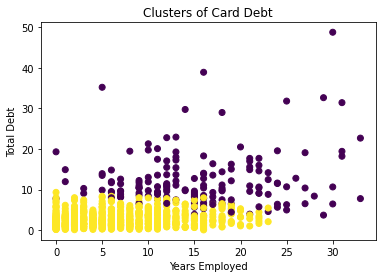

In [96]:
#create a column for the cluster labels in the dataset
data['cluster'] = kmeans.labels_ 

#Generate visualization to see the clusters based on Total Debt and Years Employed
plt.scatter(data['Years Employed'], data['total_debt'], c = data['cluster'])
plt.ylabel('Total Debt')
plt.xlabel('Years Employed')
plt.title('Clusters of Card Debt')
plt.show()

This clustering seems to split the population into show a group with total debt more than '10' and less than '10'. Based on the clsutering, it also seems that majority of the people with more than 20 years experience take on total debt that are more than '10'

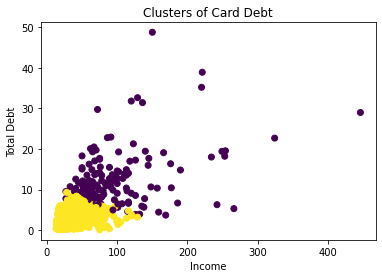

In [97]:
#Generate visualization to see the clusters based on Total Debt and Income
plt.scatter(data['Income'], data['total_debt'], c = data['cluster'])
plt.xlabel('Income')
plt.ylabel('Total Debt')
plt.title('Clusters of Card Debt')
plt.show()

The clustering seems to split the population into a group that has low income and low debt (bottom-left corner) and medium-to-high icome and somewhat high debt

**Hierarchical Clustering**

In [98]:
#Hierarchical Clustering

#Instantiate Clustering
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_data)

AgglomerativeClustering()

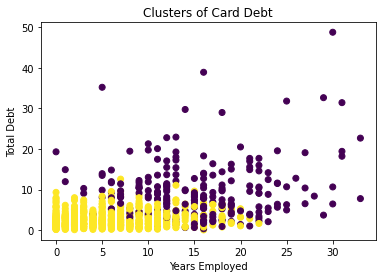

In [99]:
# Save the cluster lables to the dataframe 
data['cluster_hc'] = hc.labels_

#Generate visualization to see the clusters based on Total Debt and Years Employed
plt.scatter(data['Years Employed'], data['total_debt'], c = data['cluster_hc'])
plt.ylabel('Total Debt')
plt.xlabel('Years Employed')
plt.title('Clusters of Card Debt')
plt.show()

The clusters in this case have more points overlapping with each other than the Kmeans clustering

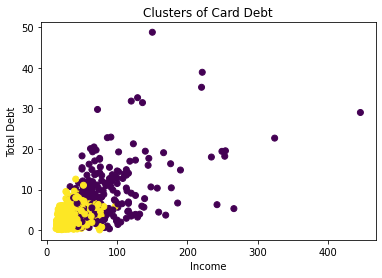

In [100]:
#Generate visualization to see the clusters based on Total Debt and Income
plt.scatter(data['Income'], data['total_debt'], c = data['cluster_hc'])
plt.xlabel('Income')
plt.ylabel('Total Debt')
plt.title('Clusters of Card Debt')
plt.show()

The observation for this clustering is the same as the one earlier. The points are overlapping and are not as clear cut as the Kmeans clustering

**DBSCAN**

In [101]:
#instantiate and fit the algo
dbs = DBSCAN(eps=0.5, min_samples=5)
dbs.fit(scaled_data)

DBSCAN()

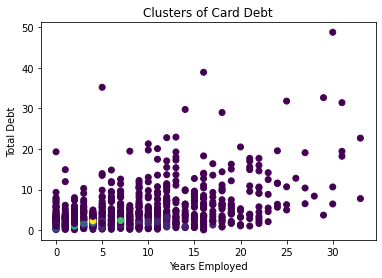

In [102]:
# Save the cluster lables to the dataframe 
data['cluster_dbs'] = dbs.labels_

#Generate visualization to see the clusters based on Total Debt and Years Employed
plt.scatter(data['Years Employed'], data['total_debt'], c = data['cluster_dbs'])
plt.ylabel('Total Debt')
plt.xlabel('Years Employed')
plt.title('Clusters of Card Debt')
plt.show()

The clusters are indistinguishable

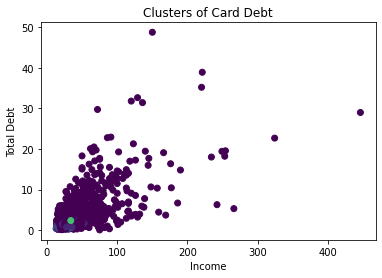

In [103]:
#Generate visualization to see the clusters based on Total Debt and Income
plt.scatter(data['Income'], data['total_debt'], c = data['cluster_dbs'])
plt.xlabel('Income')
plt.ylabel('Total Debt')
plt.title('Clusters of Card Debt')
plt.show()

Clusters are indistiguishable

**Metrics**

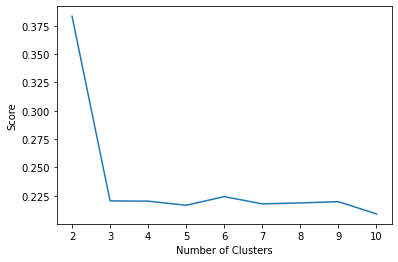

In [104]:
#silhouette score  and visualization for kmeans
score_km = []
k_range = range(2, 11)
for i in k_range:
  kmeans_m = KMeans(n_clusters=i)
  kmeans_m.fit(scaled_data)
  score_km.append(silhouette_score(scaled_data, kmeans_m.labels_))

#visualize scores
plt.plot(range(2, 11), score_km)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

From the visualization, highest silhouette score for kmeans is when n_clusters = 2



In [105]:
#get silhoutte score for kmeans when n_clusters = 2
silhouette_score(scaled_data, kmeans.labels_)

0.3834396654294567

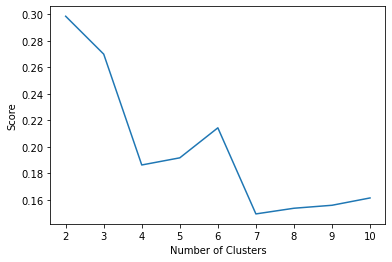

In [106]:
#silhouette score and visualization for heirarchical clustering
score_hc = []
hc_range = range(2, 11)
for i in hc_range:
  ch_m = AgglomerativeClustering(n_clusters=i)
  ch_m.fit(scaled_data)
  score_hc.append(silhouette_score(scaled_data, ch_m.labels_))

#visualize scores
plt.plot(range(2, 11), score_hc)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

From the visualization, highest silhouette score for hierarchical clustering is when n_clusters = 2

In [107]:
#get silhoutte score for heirarchical clustering when n_clusters = 2
silhouette_score(scaled_data, hc.labels_)

0.29842522017847867

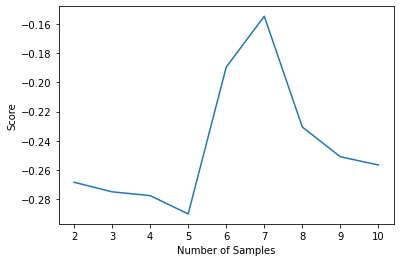

In [108]:
#silhouette score and visualization for DBSCAN
score_dbs = []
dbs_range = range(2, 11)
for i in dbs_range:
  dbs_m = DBSCAN(eps=0.5, min_samples=i)
  dbs_m.fit(scaled_data)
  score_dbs.append(silhouette_score(scaled_data, dbs_m.labels_))

#visualize scores
plt.plot(range(2, 11), score_dbs)
plt.xlabel('Number of Samples')
plt.ylabel('Score')
plt.show()

From the visualization, highest silhouette score for DBSCAN clustering is when number of samples = 7

In [109]:
#get silhoutte score for DBSCAN when number of samples = 7
dbs_best = DBSCAN(eps=0.5, min_samples=7)
dbs_best.fit(scaled_data)
silhouette_score(scaled_data, dbs_best.labels_)

-0.15472161786042934

The best clustering algorithm for this data is Kmeans beacuse it has the highest silhoutte score. Furthermore, the visualization of the clusters for kmeans shows a clearer distinction/seperateness between the clusters than the other algorithms